Tabris Loveless
10/30/22

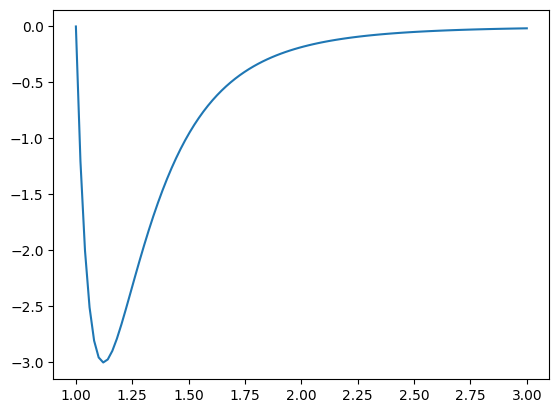

minimum value:    -2.9998650296000307
minimum value numpy random method:    -2.9999999861532602
minimum value homemade random method:    -2.9999998528205962


In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import os
import time

def potential(r):   
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def f(x, y, z):
    """
    function for energy of three atom system
    
    Args
    x float:
        distance from atom 1 to 2
    y float:
        distance from 1 to 3
    z float:
        distance from 2 to 3
    
    """
    p = potential(x) + potential(y) + potential(z)
    return p

#testing purposes and verification
r = np.linspace(1.0,3.0,100)
p = []
for i in range(len(r)):
    p.append(f(r[i], r[i], r[i]))

plt.plot(r,p)
plt.show()

print('minimum value:   ', min(p))

#scipy mimimization
#documentation site is broken 

#random search
def ranSearch(N):
    minimum = f(3, 3, 3)
    
    for i in range(N):
        #range from 1 to 3
        x = 1+(2*np.random.random())
        if f(x, x, x) < minimum:
               minimum = f(x,x,x)
        
    return minimum
               
print('minimum value numpy random method:   ', ranSearch(10000))

#for fun a diffrent prng
def Itamaraca(N = 1):
    """
    Psuedo-random number generator using absolute value functions
    Technique by
    Henrique Pereira, D. (2022). Itamaracá: A Novel Simple Way to Generate Pseudo-random Numbers. Cambridge Open Engage. doi:10.33774/coe-2022-zsw6t 
    
    Seed generation method from
    https://www.youtube.com/watch?v=zHZx9ByTo2s
    
    Generates a list of random numbers from 0 < x < 1 
    Args:
    N int:
        number of iterations, returns int if 1, returns list if greater than 1
        default is set to 1
    """
    #any number here, more precision with larger numbers
    m = 2**31
    #seed generation, needs 3 numbers smaller then m
    #gets number from time muiltiplied by processing id, then takes the modulus of m to get a number less then m
    #random factors added to generate diffrent numbers
    snlist = [int(time.time()*os.getpid())%m, int(time.time()*os.getpid()*15)%m,int(time.time()*os.getpid()*73)%m]

    #case for single number
    if N  == 1:
        p = np.absolute((snlist[2]-snlist[1])+(snlist[1]-snlist[0]))
        #needs square root of number between 1<x<4
        #used pi for the squareroot variable 
        FN = int(np.absolute(m-(p*np.sqrt(3.1459))))
        return FN/m
    
    #case for list of numbers
    elif N > 1:
        p = 0 
        FN = 0
        results = []
        for i in range(N):
            p = np.absolute((snlist[2]-snlist[1])+(snlist[1]-snlist[0]))
            #needs square root of number between 1<x<4
            FN = int(np.absolute(m-(p*np.sqrt(3.1459))))
            #dividing FN/n gives you a float ranging from 0 < x < 1
            results.append(FN/m)
            #adds FN to newest sn number, then pops oldest number
            snlist.append(FN)
            snlist.pop(0)
        return results
    #error case
    else:
        print("ERROR: N < 0, Has to be greater than 1")

def itaSearch(N):
    minimum = f(3, 3, 3)
    numbers = Itamaraca(N)
    for i in range(N):
        #range from 1 to 3
        x = 1+(2*numbers[i])
        if f(x, x, x) < minimum:
               minimum = f(x,x,x)
        
    return minimum

print('minimum value homemade random method:   ', itaSearch(10000))